# Importing Data and Basic Pre-Processing

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 885 kB/s eta 0:00:01


In [3]:
# df = pd.read_excel("../input/auto-eval/Tutorial 1_corrected(1-1174).xlsx", "Q8", usecols = [3, 6, 7, 8] ,engine="openpyxl")
df = pd.read_excel("../input/tutorial-1-corrected/Tutorial 1_corrected(1-1174).xlsx", "Q7", usecols = [5, 6, 7, 8, 9], engine = 'openpyxl')

In [4]:
df.head()

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5)
0,What kind of behaviour is suspicious?,0,0,0.0,0.0
1,How many people have entered the airport in th...,3,0,1.5,0.0
2,How many people have entered the airport in th...,3,0,1.5,0.0
3,How many people have entered the airport in th...,3,0,1.5,0.0
4,How many people have entered the airport in th...,3,0,1.5,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 1174 non-null   object 
 1   Points - Question 7: CO1                        1174 non-null   int64  
 2   Give explanation for Question 7 here:           1174 non-null   object 
 3   Points - Give explanation for Question 7 here:  1174 non-null   float64
 4   Rationale Score(1.5)                            1174 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 46.0+ KB


In [6]:
# df['Points - Question 11 - CO4.1'].unique()
# df['Rationale Score(1.5)'].unique()

In [7]:
# df["Explanation for question 11 here"].replace(0, np.nan, inplace = True)
df["Give explanation for Question 7 here:"].replace(0, np.nan, inplace = True)
x = df.dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 92 to 1173
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 1082 non-null   object 
 1   Points - Question 7: CO1                        1082 non-null   int64  
 2   Give explanation for Question 7 here:           1082 non-null   object 
 3   Points - Give explanation for Question 7 here:  1082 non-null   float64
 4   Rationale Score(1.5)                            1082 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 50.7+ KB


In [8]:
x['Column1_lower'] = x['Give explanation for Question 7 here:'].astype(str).str.lower()
duplicates = x.duplicated(subset='Column1_lower')
duplicates.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count      1082
unique        2
top       False
freq       1074
dtype: object

In [9]:
y = x[x.duplicated(subset='Column1_lower')]
y

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5),Column1_lower
416,How many people have entered the airport in th...,3,considering that we need a computer-based solu...,0.0,0.0,considering that we need a computer-based solu...
519,What kind of luggage is the most aesthetically...,0,How many people have entered the airport in th...,0.0,0.0,how many people have entered the airport in th...
623,How many people have entered the airport in th...,3,Intelligent cameras with built-in video analyt...,0.0,0.0,intelligent cameras with built-in video analyt...
837,How many people have entered the airport in th...,3,Something is specific when it can be answered ...,0.0,0.0,something is specific when it can be answered ...
954,How many people have entered the airport in th...,3,The number of people who've entered the airpor...,0.0,0.0,the number of people who've entered the airpor...
955,How many people have entered the airport in th...,3,The number of people who've entered the airpor...,0.0,0.0,the number of people who've entered the airpor...
1012,How many people have entered the airport in th...,3,The question that can be asked to the computer...,0.0,0.0,the question that can be asked to the computer...
1065,What kind of behaviour is suspicious?,0,the whole thing is based on their behaviour .t...,0.0,0.0,the whole thing is based on their behaviour .t...


In [10]:
# print(y.loc[1123]['Give explanation for Question 7 here:'])
print(y.loc[1012]['Give explanation for Question 7 here:'])
len(y)

The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific).


8

In [11]:
x.drop_duplicates(subset = 'Column1_lower', keep = False, inplace = True)
x.drop('Column1_lower', axis=1, inplace=True)
x.reset_index(inplace=True, drop=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 1067 non-null   object 
 1   Points - Question 7: CO1                        1067 non-null   int64  
 2   Give explanation for Question 7 here:           1067 non-null   object 
 3   Points - Give explanation for Question 7 here:  1067 non-null   float64
 4   Rationale Score(1.5)                            1067 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.8+ KB


In [13]:
# x['Points - Question 11 - CO4.1'] = x['Points - Question 11 - CO4.1'] - (x['Points - Question 11 - CO4']/2)
# # x['Points - Question 12 - CO4.1'] = x['Points - Question 12 - CO4.1'] - 1.5
# # x.loc[df['Points - Question 12 - CO4.1'] < 0, 'Points - Question 12 - CO4.1'] = 0
# # x.sample(5)
# x['Points - Question 11 - CO4.1'].unique()

In [14]:
# x["Points - Question 11 - CO4.1"].replace(-1.5, np.nan, inplace = True)
# x = x.dropna()
# x['Points - Question 11 - CO4.1'].unique()

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 1067 non-null   object 
 1   Points - Question 7: CO1                        1067 non-null   int64  
 2   Give explanation for Question 7 here:           1067 non-null   object 
 3   Points - Give explanation for Question 7 here:  1067 non-null   float64
 4   Rationale Score(1.5)                            1067 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.8+ KB


In [16]:
# x['Points - Question 12 - CO4.1'].unique()

In [17]:
# x.groupby('Points - Question 11 - CO4.1').count()
# x.groupby('Points - Question 11 - CO4.1').count()
x.groupby('Rationale Score(1.5)').count()

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:
Rationale Score(1.5),,,,
0.0,873,873,873,873
0.5,69,69,69,69
1.0,46,46,46,46
1.5,79,79,79,79


In [18]:
# a = x[x['Rationale Score(1.5)'] == 0.5]
# b = x[x['Rationale Score(1.5)'] == 1.5]
# c = x[x['Rationale Score(1.5)'] == 1.0]
# d = x[x['Rationale Score(1.5)'] == 0.0].sample(100)

# x = pd.concat([a,b,c,d])
# # x.head()

# x = x.sample(frac=1)
# x.head()

In [19]:
# x.info()

### I refrained from most text pre-processing steps because
### 1. Stop word removal - words like "and", "for", "while" hold meaning in a computer science context
### 2. Lowercasing - could change the representation of variables - i is different from I
### 3. Lemmatization - could be done but since none of the other steps for words have been performed it wouldnt make much of a difference

# Text Vectorization - BERT

In [20]:
import torch
import transformers as ppb
import warnings
# import csv
warnings.filterwarnings('ignore')

In [21]:
# For DistilBERT:
###### We're using DistilBERT. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. 
#It’s a lighter and faster version of BERT that roughly matches its performance.
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [22]:
tokenized_text = x['Give explanation for Question 7 here:'].apply((lambda y: tokenizer.encode(y, add_special_tokens=True))) 
#print(tokenized_text)
max_len = 0
for i in tokenized_text.values:
  if len(i) > max_len:
    max_len = len(i)

padded_text = np.array([i + [0]*(max_len-len(i)) for i in tokenized_text.values])
print(np.array(padded_text).shape)

attention_mask_text = np.where(padded_text != 0, 1, 0)
print(attention_mask_text.shape)

(1067, 295)
(1067, 295)


In [23]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
input_ids_text = torch.tensor(padded_text)  
att_mask_text = torch.tensor(attention_mask_text)  

text_data = TensorDataset(input_ids_text, att_mask_text)
text_dataloader = DataLoader(text_data,batch_size=32)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
print(device)
print(n_gpu)
torch.cuda.get_device_name(0)

cuda
1


'Tesla P100-PCIE-16GB'

In [25]:
features_text = []
for step, batch in enumerate(text_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    input_ids_text, attention_mask_text = batch
    # Get the features
    model.to(device)
    with torch.no_grad():
        last_hidden_states = model(input_ids_text, attention_mask=attention_mask_text)
    features_text_batch = (last_hidden_states[0][:,0,:]).detach().cpu().numpy()   
    #append to the feature vector
    features_text.append(features_text_batch)

In [26]:
features_text[0].shape


(32, 768)

In [27]:
features_text_2 = []
for i in range(33):
    for j in range(32):
        features_text_2.append(features_text[i][j])
try:    
    for j in range(26): #26
        features_text_2.append(features_text[33][j])
except:
    pass

In [28]:
len(features_text_2)

1067

In [29]:
text_vec = features_text_2

In [30]:
x.to_csv("pre-processed q7 tut1.csv")

In [31]:
import pickle
pick_out = open("q7 tut1 textvec", 'wb')
pickle.dump(text_vec, pick_out)
pick_out.close()

# Text Similarity Analysis

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
#let's calculate cosine similarity for sentence 0:
similarities = cosine_similarity(text_vec,text_vec)

In [33]:
similarities.shape

(1067, 1067)

In [34]:
similarities

array([[1.0000006 , 0.88162756, 0.8754472 , ..., 0.89961374, 0.89927804,
        0.849497  ],
       [0.88162756, 0.9999996 , 0.8059038 , ..., 0.8449261 , 0.84956455,
        0.83825874],
       [0.8754472 , 0.8059038 , 0.9999999 , ..., 0.81297946, 0.84525   ,
        0.7926494 ],
       ...,
       [0.89961374, 0.8449261 , 0.81297946, ..., 1.0000001 , 0.9393699 ,
        0.8537425 ],
       [0.89927804, 0.84956455, 0.84525   , ..., 0.9393699 , 0.99999994,
        0.85435677],
       [0.849497  , 0.83825874, 0.7926494 , ..., 0.8537425 , 0.85435677,
        0.99999994]], dtype=float32)

In [35]:
print(np.mean(similarities))

0.89473534


In [36]:
print(np.std(similarities))

0.04274076


In [37]:
indices = []
for i in range(len(similarities)):
    avg = np.mean(similarities[i])
    if avg>= 0.895:
        indices.append(int(i))

In [38]:
len(indices)

645

In [39]:
x.drop(indices, inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 1 to 1066
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 422 non-null    object 
 1   Points - Question 7: CO1                        422 non-null    int64  
 2   Give explanation for Question 7 here:           422 non-null    object 
 3   Points - Give explanation for Question 7 here:  422 non-null    float64
 4   Rationale Score(1.5)                            422 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.8+ KB


In [40]:
x.groupby("Rationale Score(1.5)").count()

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:
Rationale Score(1.5),,,,
0.0,367,367,367,367
0.5,19,19,19,19
1.0,12,12,12,12
1.5,24,24,24,24


In [41]:
text_vec = np.delete(np.array(text_vec), indices, axis=0)
len(text_vec)

422

# BIRCH

In [42]:
!pip install pyclustering
!pip install scikit-learn-extra
!pip install bert-extractive-summarizer
!pip install neuralcoref
!pip install spacy

!pip install fuzzy-c-means
!pip install kmodes

     |████████████████████████████████| 2.6 MB 901 kB/s eta 0:00:01
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=5743d13b6299c5dff2a246179849aa25251d14a316e0f0c660b7d4c459ee2689
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering
     |████████████████████████████████| 1.7 MB 908 kB/s eta 0:00:01
     |████████████████████████████████| 286 kB 895 kB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 1.3 MB/s eta 0:00:01    |▌                               | 235 kB 1.3 MB/s eta 0:00:13     |█                               | 460 kB 1.3 MB/s eta 0:00:12     |██                              | 942 kB 1.3 MB/s eta 0:00:12     |█████████▌                      | 4.7 MB 1.3 MB/s eta 0:00:09     |█████████████▍                  | 6.6 MB 1.3 MB/s eta 0:00:08
     |████████████████████████████████| 82 kB 497 kB/s  eta 0:00:01
  Attempting uninst

In [43]:
# !pip install som-learn
# from sklearn_som.som import SOM
# from somlearn import SOM
# som = SOM(n_columns=2, n_rows=2, random_state=1)
# #som.fit(text_vec.toarray())
# labels = som.fit_predict(text_vec)#.toarray())
# # predictions = som.predict(feature_vec)

In [44]:
x

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5)
1,How many people have entered the airport in th...,3,because computers do not under stand our inte...,1.5,1.0
2,How many people have entered the airport in th...,3,Cameras with built-in video analytics are beg...,1.5,0.0
3,How many people have entered the airport in th...,3,computer based solution can able to determine...,1.5,0.5
4,What kind of luggage is the most aesthetically...,0,Everyone can enter into airport with a prope...,0.0,0.0
9,Why is flying better than driving a car?,0,n,0.0,0.0
...,...,...,...,...,...
1062,How many people have entered the airport in th...,3,with a help of a surveillance system we can on...,1.5,0.0
1063,How many people have entered the airport in th...,3,With airport operators under increasing pressu...,1.5,0.0
1064,What kind of behaviour is suspicious?,0,with the help of these type question we can fi...,0.0,0.0
1065,What kind of behaviour is suspicious?,0,with the use of surveillance system we will be...,0.0,0.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 320256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 320256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 320256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 320256.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 320256.0
Best run was number 1


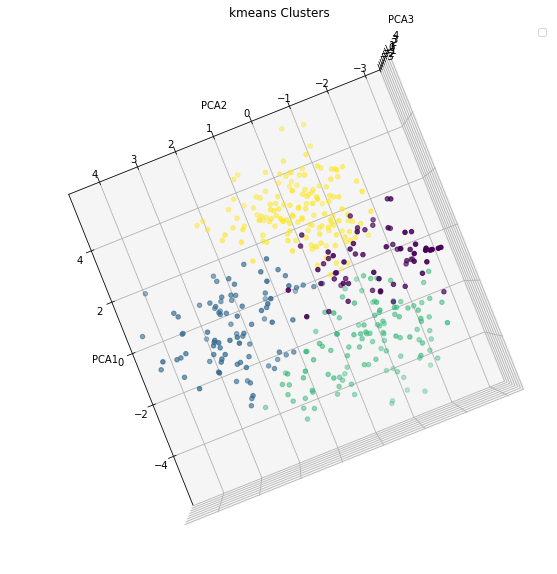

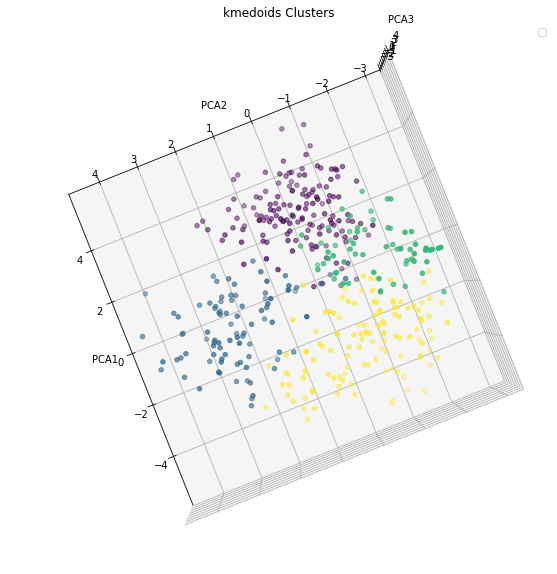

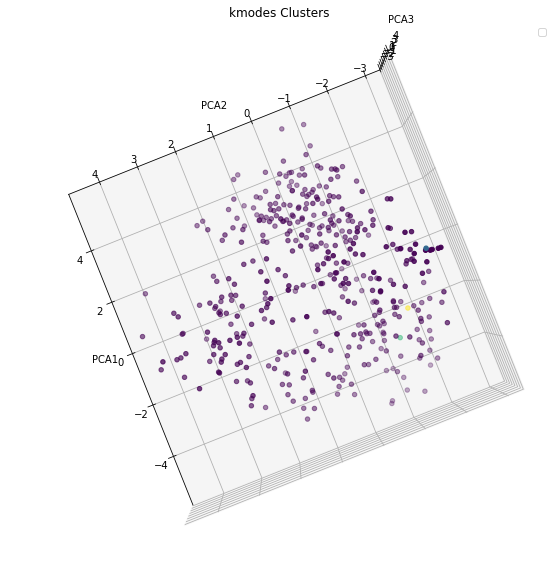

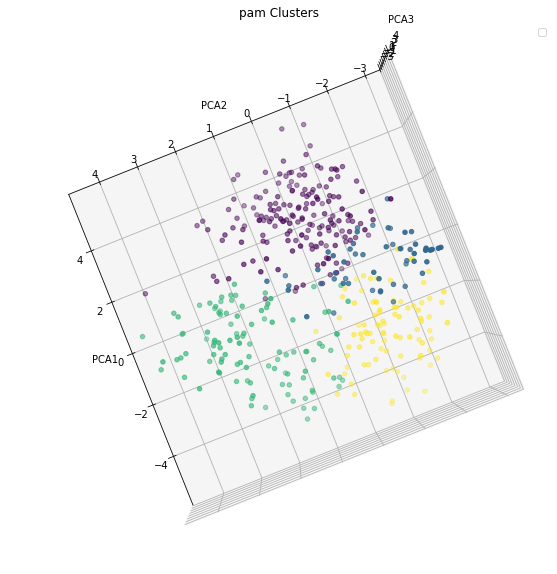

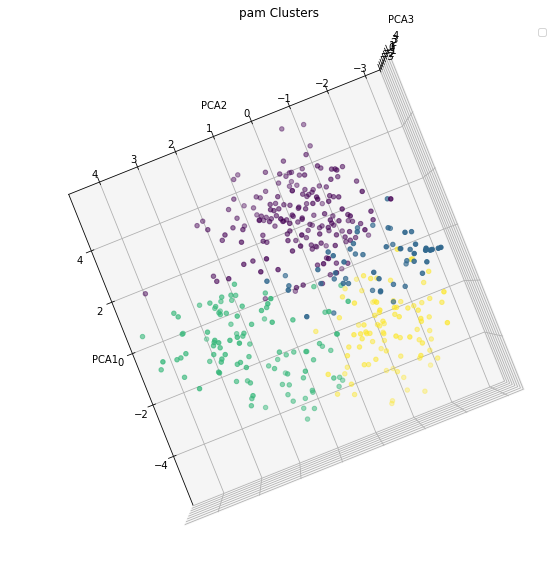

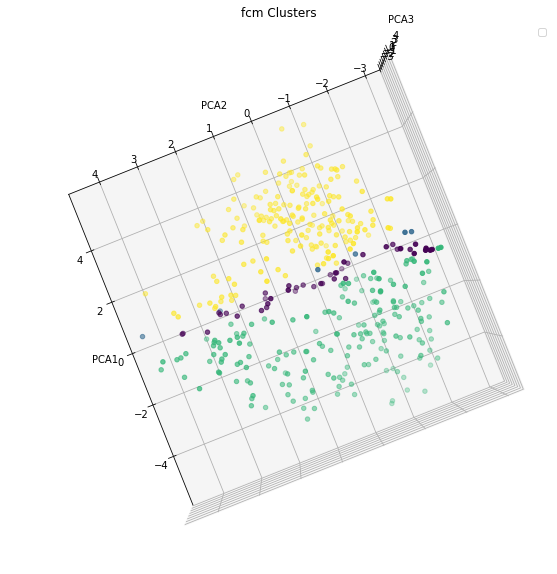

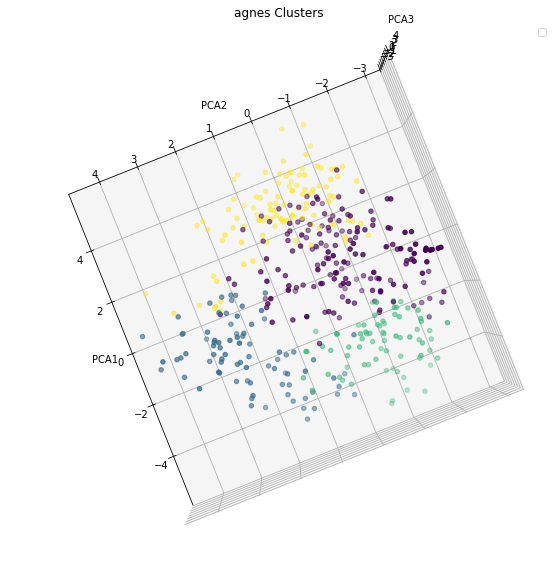

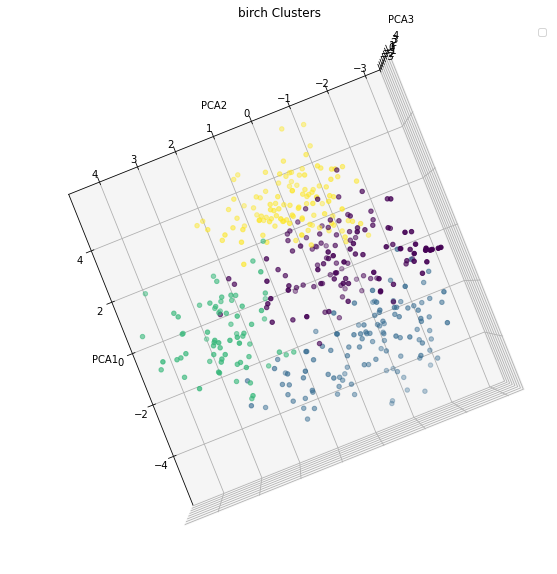

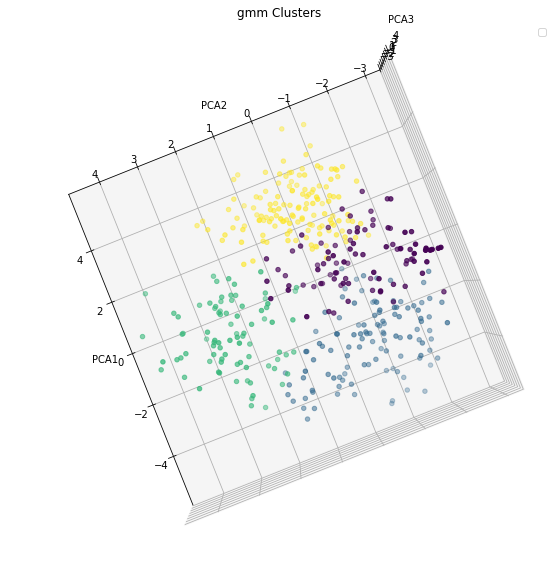

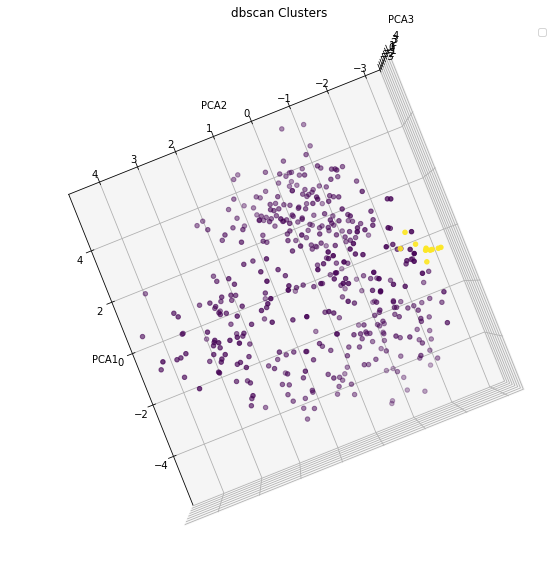

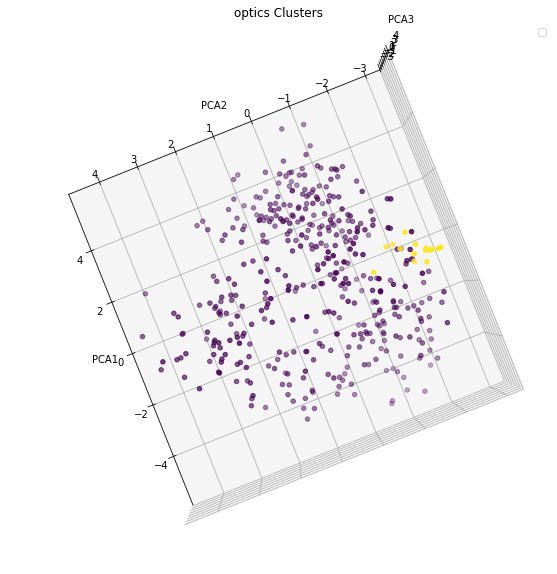

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from summarizer import Summarizer
from mpl_toolkits import mplot3d

model = Summarizer()

for i in range(11):
    if i == 0:
        title = "kmeans"
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
        preds = kmeans.labels_
    if i == 1:
        title = "kmedoids"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'alternate' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 2:
        title = "kmodes"
        from kmodes.kmodes import KModes
        kmode = KModes(n_clusters=4, init = "Huang", n_init = 5, verbose=1)
        preds = kmode.fit_predict(text_vec)
    if i == 3:
        title = "pam"
        from sklearn_extra.cluster import KMedoids #method{‘alternate’, ‘pam’}, default: ‘alternate’
        kmedoids = KMedoids(n_clusters=4, method = 'pam' ,random_state=0).fit(text_vec)
        preds = kmedoids.labels_
    if i == 5:
        title = "fcm"
        from fcmeans import FCM
        fcm = FCM(n_clusters=4)
        fcm.fit(np.array(text_vec))
        preds = fcm.predict(np.array(text_vec))
    if i == 6:
        title = "agnes"
        from sklearn.cluster import AgglomerativeClustering
        preds = AgglomerativeClustering(n_clusters=4,linkage='complete').fit_predict(text_vec)
    if i == 7:
        title = "birch"
        from sklearn.cluster import Birch  
        birch = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)
        birch.fit(text_vec)
        preds = birch.predict(text_vec)
    if i == 8:
        title = "gmm"
        from sklearn.mixture import GaussianMixture
        gmm = GaussianMixture(n_components=4)
        gmm.fit(text_vec)
        preds = gmm.predict(text_vec)
    if i == 9:
        title = "dbscan"
        from sklearn.cluster import DBSCAN
        preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(text_vec)
    if i == 10:
        title = "optics"
        from sklearn.cluster import OPTICS
        preds = OPTICS(min_samples=5).fit_predict(text_vec)
    
    
    # reduce the features to 2D
    pca = PCA(n_components=3)
    reduced_features = pca.fit_transform(text_vec)#.toarray())
    reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
    a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(a1, a2, a3, c=preds)
    ax.view_init(90, 160)
    plt.title(title + " Clusters")
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.legend()
    plt.savefig(title + '.png')
    
    x['labels_'+title] = preds
    # print(type(x))
    body1 = ''
    body2 = ''
    body3 = ''
    body4 = ''
    for i in range(len(x)):
        if x.iloc[i]['labels_'+title] == 0:
            body1 = body1 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        elif x.iloc[i]['labels_'+title] == 1:
            body2 = body2 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        elif x.iloc[i]['labels_'+title] == 2:
            body3 = body3 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        elif x.iloc[i]['labels_'+title] == 3:
            body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        elif x.iloc[i]['labels_'+title] == -1:
            body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
    
    result1 = model(body1,num_sentences=5)
    result2 = model(body2,num_sentences=5)
    result3 = model(body3,num_sentences=5)
    result4 = model(body4,num_sentences=5)
    
    file = open("summaries_"+title+".txt", "w")
    file.write("SUMMARY 0\n")
    file.write(result1 +"\n\n")
    file.write("SUMMARY 1\n")
    file.write(result2 +"\n\n")
    file.write("SUMMARY 2\n")
    file.write(result3 +"\n\n")
    file.write("SUMMARY 3/-1\n")
    file.write(result4 +"\n\n")
    file.close()

In [46]:
x.to_csv("preds for all q11 tut1.csv")

Text(0.5, 0.92, 'Original Clusters')

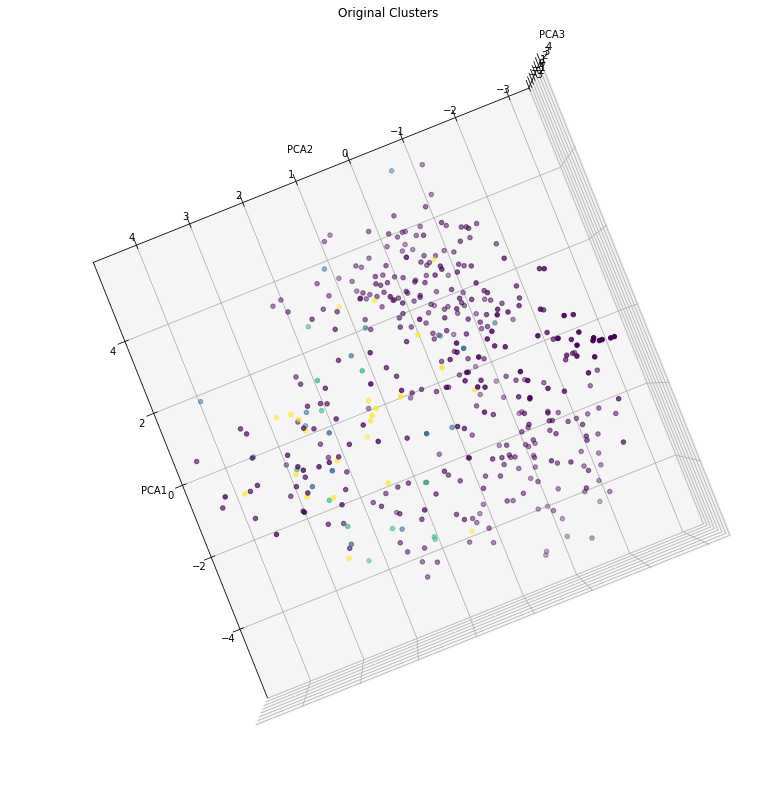

In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from summarizer import Summarizer
from sklearn.cluster import DBSCAN

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
color_dict = { 0.0:0, 0.5:1, 1.0:2, 1.5:3}
#plt.scatter(reduced_features[:,0], reduced_features[:,1],c = [color_dict[i] for i in x['Rationale Score(1.5)']])
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']
    
fig = plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = [color_dict[i] for i in x['Rationale Score(1.5)']])
ax.view_init(90, 160)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.savefig('Original Clusters' + '.png')
plt.title("Original Clusters")

Done.


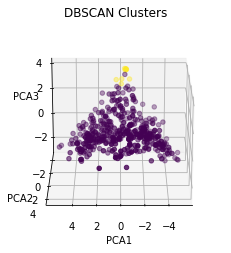

In [98]:
#model = Summarizer()

# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(text_vec)
reduced_features_df = pd.DataFrame(reduced_features, columns = ['PCA1','PCA2','PCA3'])
a1, a2, a3 = reduced_features_df['PCA1'],reduced_features_df['PCA2'],reduced_features_df['PCA3']


title = "DBSCAN"
preds = DBSCAN(eps=2.5, min_samples=10).fit_predict(text_vec)
# from sklearn.cluster import OPTICS
# preds = OPTICS(min_samples=4).fit_predict(text_vec)

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4, random_state=0).fit(text_vec)
# preds = kmeans.labels_

# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(a1, a2, a3, c = preds)
ax.view_init(20,90)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
# plt.savefig(title + '.png')
plt.title(title + " Clusters")

#plt.savefig(title + '.png')

x['labels_'+title] = preds

body1 = ''
body2 = ''
body3 = ''
body4 = ''
for i in range(len(x)):
    if x.iloc[i]['labels_'+title] == 0:
        body1 = body1 + " " + x.iloc[i]['Give explanation for Question 7 here:']
    elif x.iloc[i]['labels_'+title] == 1:
        body2 = body2 + " " + x.iloc[i]['Give explanation for Question 7 here:']
    elif x.iloc[i]['labels_'+title] == 2:
        body3 = body3 + " " + x.iloc[i]['Give explanation for Question 7 here:']
    elif x.iloc[i]['labels_'+title] == 3:
        body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
    elif x.iloc[i]['labels_'+title] == -1:
        body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']

result1 = model(body1,num_sentences=5)
result2 = model(body2,num_sentences=5)
result3 = model(body3,num_sentences=5)
result4 = model(body4,num_sentences=5)

file = open("temp_summaries_"+title+".txt", "w")
file.write("SUMMARY 0\n")
file.write(result1 +"\n\n")
file.write("SUMMARY 1\n")
file.write(result2 +"\n\n")
file.write("SUMMARY 2\n")
file.write(result3 +"\n\n")
file.write("SUMMARY 3/-1\n")
file.write(result4 +"\n\n")
file.close()

print("Done.")

In [49]:
x.groupby("labels_DBSCAN").count()

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5),labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics
labels_DBSCAN,,,,,,,,,,,,,,,
-1,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [50]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from summarizer import Summarizer

# title = "clarans"
# from pyclustering.cluster.clarans import clarans
# clara_instance = clarans(text_vec, 4, 1, 5)
# clara_instance.process()
# clusters = clara_instance.get_clusters()
# preds = [0]*1082
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())
# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title(title + " Clusters")
# plt.savefig(title + '.png')

# x['labels_'+title] = preds

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels_'+title] == 0:
#         body1 = body1 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 1:
#         body2 = body2 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 2:
#         body3 = body3 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == 3:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
#     elif x.iloc[i]['labels_'+title] == -1:
#         body4 = body4 + " " + x.iloc[i]['Explanation for question 12 here']
            
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# result2 = model(body2,num_sentences=5)
# result3 = model(body3,num_sentences=5)
# result4 = model(body4,num_sentences=5)

# file = open("summaries_"+title+".txt", "w")
# file.write("SUMMARY 0\n")
# file.write(result1 +"\n\n")
# file.write("SUMMARY 1\n")
# file.write(result2 +"\n\n")
# file.write("SUMMARY 2\n")
# file.write(result3 +"\n\n")
# file.write("SUMMARY 3/-1\n")
# file.write(result4 +"\n\n")
# file.close()

# x.to_csv("preds for clarans q7 tut1")

In [51]:
# import collections
# frequency = collections.Counter(preds)
# print(dict(frequency))

In [52]:
# from pyclustering.cluster.clique import clique
# # create CLIQUE algorithm for processing
# intervals = 1  # defines amount of cells in grid in each dimension
# threshold = 0   # lets consider each point as non-outlier
# clique_instance = clique(text_vec, intervals, threshold)
 
# # start clustering process and obtain results
# clique_instance.process()
# clusters = clique_instance.get_clusters()  # allocated clusters
# # noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
# # cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid



# from pyclustering.cluster.fcm import fcm
# from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
# # initialize
# initial_centers = kmeans_plusplus_initializer(text_vec, 2, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
 
# # create instance of Fuzzy C-Means algorithm
# fcm_instance = fcm(text_vec, initial_centers)
 
# # run cluster analysis and obtain results
# fcm_instance.process()
# clusters = fcm_instance.get_clusters()

# !pip install fuzzy-c-means
# from fcmeans import FCM
# fcm = FCM(n_clusters=4)
# fcm.fit(np.array(text_vec))
# preds = fcm.predict(np.array(text_vec))

In [53]:
# clusters = clara_instance.get_clusters()

In [54]:
#model.process()
# len(clusters)

In [55]:
# preds = [0]*1082
# # clus = model.get_clusters()
# for j in range(4):
#     for i in clusters[j]:
#         preds[i] = j


In [56]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # reduce the features to 2D
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(text_vec)#.toarray())

# # reduce the cluster centers to 2D
# #reduced_cluster_centers = pca.transform(cls.cluster_centers_)


# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=preds)
# plt.title("CLARANS Clusters")
# #plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [57]:
# x['labels'] = preds

In [58]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [59]:
# x.groupby('labels').count()

In [60]:
# !pip install bert-extractive-summarizer
# !pip install neuralcoref
# !pip install spacy

In [61]:
# from summarizer import Summarizer

# body1 = ''
# body2 = ''
# body3 = ''
# body4 = ''
# for i in range(len(x)):
#     if x.iloc[i]['labels'] == 0:
#         body1 = body1 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 1:
#         body2 = body2 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 2:
#         body3 = body3 + " " + x.iloc[i]['Give explanation for Question 7 here:']
#     elif x.iloc[i]['labels'] == 3:
#         body4 = body4 + " " + x.iloc[i]['Give explanation for Question 7 here:']
        
# model = Summarizer()

# result1 = model(body1,num_sentences=5)
# #body1_vec = model.run_embeddings(body1, num_sentences=5)

# result2 = model(body2,num_sentences=5)
# #body2_vec = model.run_embeddings(body2, num_sentences=5)

# result3 = model(body3,num_sentences=5)
# #body3_vec = model.run_embeddings(body3, num_sentences=5)

# result4 = model(body4,num_sentences=5)
# #body4_vec = model.run_embeddings(body4, num_sentences=5)

In [62]:
# result4

In [63]:
# correct_answer = "Among the given options Only option that can be quantifiable is about the number of people entering the airport. Other options are subjective to the situation which are not actually quantifiable"
# #correct_answer_vec = model.run_embeddings(correct_answer, ratio=1)

In [64]:
# body1_vec.shape

In [65]:
# !pip install gensim

In [66]:
# from sklearn.metrics.pairwise import cosine_similarity
# #let's calculate cosine similarity for sentence 0:
# cosine_similarity(
#     body1_vec,correct_answer_vec)

In [67]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# doc = nlp(correct_answer)
# doc1 = nlp(result1)
# doc2 = nlp(result2) 
# doc3 = nlp(result3)
# doc4 = nlp(result4)

# print (doc.similarity(doc1)) 
# print (doc.similarity(doc2))
# print (doc.similarity(doc3))
# print (doc.similarity(doc4))

In [68]:
# x = pd.read_csv("../input/predictionscluster-labels/preds for all q12 tut1.csv")
# x.drop("Unnamed: 0" ,axis=1,inplace=True)

In [69]:
# x.head(1)

In [70]:
# x.groupby('Points - Question 12 - CO4.1').count()

In [71]:
x.head(1)

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5),labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics,labels_DBSCAN
1,How many people have entered the airport in th...,3,because computers do not under stand our inte...,1.5,1.0,1,1,0,2,2,1,2,2,-1,-1,-1


In [72]:
x.loc[x['labels_dbscan'] == x['labels_DBSCAN']].shape

(422, 16)

In [73]:
x.shape

(422, 16)

In [74]:
assigned_score = []
for i in x['labels_DBSCAN']:
    #print(i)
    if i == 0:
        assigned_score.append(1.5)
    elif i == 1:
        assigned_score.append(0.5)
    elif i == 2:
        assigned_score.append(1)
    else:
        assigned_score.append(0)

In [75]:
x['dbscan_assigned_score'] = assigned_score

In [76]:
x.head(10)

,Question 7: CO1,Points - Question 7: CO1,Give explanation for Question 7 here:,Points - Give explanation for Question 7 here:,Rationale Score(1.5),labels_kmeans,labels_kmedoids,labels_kmodes,labels_pam,labels_fcm,labels_agnes,labels_birch,labels_gmm,labels_dbscan,labels_optics,labels_DBSCAN,dbscan_assigned_score
1,How many people have entered the airport in th...,3,because computers do not under stand our inte...,1.5,1.0,1,1,0,2,2,1,2,2,-1,-1,-1,0.0
2,How many people have entered the airport in th...,3,Cameras with built-in video analytics are beg...,1.5,0.0,0,2,0,1,0,0,0,0,0,0,0,1.5
3,How many people have entered the airport in th...,3,computer based solution can able to determine...,1.5,0.5,3,1,0,0,3,3,2,3,-1,-1,-1,0.0
4,What kind of luggage is the most aesthetically...,0,Everyone can enter into airport with a prope...,0.0,0.0,3,0,0,0,3,3,3,3,-1,-1,-1,0.0
9,Why is flying better than driving a car?,0,n,0.0,0.0,2,3,0,3,2,2,1,1,-1,-1,-1,0.0
10,How many people have entered the airport in th...,3,only passengers are allowed enter into the ai...,1.5,0.0,0,2,0,3,2,0,1,0,-1,-1,-1,0.0
13,How many people have entered the airport in th...,3,we can find how many people have entered in t...,1.5,0.0,3,0,0,0,3,3,3,3,-1,-1,-1,0.0
16,How many people have entered the airport in th...,3,"""As this is a computer based system it can't b...",1.5,0.0,2,3,0,3,2,2,1,1,-1,-1,-1,0.0
18,How many people have entered the airport in th...,3,"""How many people have entered the airport in t...",1.5,1.0,3,0,0,0,3,3,3,3,-1,-1,-1,0.0
24,How many people have entered the airport in th...,3,"""How many people have entered the airport in t...",1.5,1.5,1,1,0,2,0,0,0,2,-1,-1,-1,0.0


In [77]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(x['Points - Question 12 - CO4.1'], x['kmeans_assigned_score'])

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print(classification_report(x['dbscan_assigned_score'].astype("str"), x['Rationale Score(1.5)'].astype("str"), digits = 3))
#accuracy_score(x['Rationale Score(1.5)'].astype("str"), x['dbscan_assigned_score'].astype("str"))

              precision    recall  f1-score   support

         0.0      0.973     0.867     0.917       412
         0.5      0.000     0.000     0.000         0
         1.0      0.000     0.000     0.000         0
         1.5      0.000     0.000     0.000        10

    accuracy                          0.846       422
   macro avg      0.243     0.217     0.229       422
weighted avg      0.950     0.846     0.895       422



In [79]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(x['Rationale Score(1.5)'].astype("str"), x['dbscan_assigned_score'].astype("str"))

-0.029654654654654555

In [80]:
# indices = [14,15,19,20,26,34,48,56,64,69,80,84,96,105,107,112,120,126,151,188,190,196,197,200,215,216,223,232,239,268,275,281,286,323,325,329,335,337,345,355,367,370,379,380,383,384,386,415,424,427,428,431,435,437,445,452,464,477,494,500,502,518,523,568,573,579,584,592,604,610,642,652,655,657,674,684,705,709,717,724,751,753,770,778,779,800,812,813,818,824,825,830,835,839,860,905,925,927,946,949,950,973,977,979,993,1012,1013,1014,1036,1038,1047,1048,1049,1057,1060] 
# for i in indices:
#      x['dbscan_assigned_score'].iloc[i] = x['Rationale Score(1.5)'].iloc[i]

In [81]:
mismatch = x[x['Rationale Score(1.5)'] != x['dbscan_assigned_score']]

In [82]:
mismatch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 1 to 994
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Question 7: CO1                                 65 non-null     object 
 1   Points - Question 7: CO1                        65 non-null     int64  
 2   Give explanation for Question 7 here:           65 non-null     object 
 3   Points - Give explanation for Question 7 here:  65 non-null     float64
 4   Rationale Score(1.5)                            65 non-null     float64
 5   labels_kmeans                                   65 non-null     int32  
 6   labels_kmedoids                                 65 non-null     int64  
 7   labels_kmodes                                   65 non-null     uint16 
 8   labels_pam                                      65 non-null     int64  
 9   labels_fcm                                  

In [83]:
x.to_excel("clusters and scores.xlsx")

In [84]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y = label_binarize(x['Rationale Score(1.5)'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
y_dbscan = label_binarize(x['dbscan_assigned_score'].astype("str"), classes=['0.0', '0.5', '1.0', '1.5'])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_dbscan[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_dbscan.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

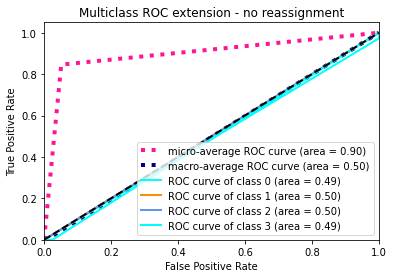

In [85]:
lw = 2
n_classes=4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC extension - no reassignment')
plt.legend(loc="lower right")
plt.show()

In [86]:
print(classification_report([0,1,2,1,1,2,0], [0,3,2,1,1,0,0], digits = 3))
cohen_kappa_score([0,1,2,1,1,2,0], [0,3,2,1,1,0,0])

              precision    recall  f1-score   support

           0      0.667     1.000     0.800         2
           1      1.000     0.667     0.800         3
           2      1.000     0.500     0.667         2
           3      0.000     0.000     0.000         0

    accuracy                          0.714         7
   macro avg      0.667     0.542     0.567         7
weighted avg      0.905     0.714     0.762         7



0.6

In [87]:
# # from statsmodels.stats.inter_rater import fleiss_kappa
# # z = [x['Rationale Score(1.5)'], x['assigned_score']]
# # fleiss_kappa(z, method='fleiss')

# from nltk import agreement
# # formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] + [[2,i,coder2[i]] for i in range(len(coder2))]  + [[3,i,coder3[i]] for i in range(len(coder3))]
# formatted_codes = [[1 , i, x.iloc[i]['Rationale Score(1.5)'].astype("str")] for i in range(len(x))] + [[2,i,x.iloc[i]['kmedoids_assigned_score'].astype("str")] for i in range(len(x))]


# ratingtask = agreement.AnnotationTask(data=formatted_codes)

# print('Fleiss\'s Kappa:',ratingtask.multi_kappa())

### J=sensitivity+specificity−1   

In [88]:
# from sklearn.metrics import confusion_matrix
# import math

# cnf_matrix = confusion_matrix(x['Points - Question 12 - CO4.1'].astype("str"), x['kmeans_assigned_score'].astype("str"))
# # print(cnf_matrix)
# FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
# FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
# TP = np.diag(cnf_matrix)
# TN = cnf_matrix.sum() - (FP + FN + TP)

# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# # print(TP, FP, FN, TN)
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 

# j_stat = TPR+TNR-1
# print(np.mean(j_stat))

In [89]:
# x.to_csv("q7 assigned scores.csv")

In [90]:
# from summarizer import Summarizer

# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# #model = Summarizer()
# res = model.calculate_optimal_k(body, k_max=10)
# print(res)

In [91]:
# body = 'The question that can be asked to the computer should be specific and quantifiable. Out of the four options, the number of people that have entered the airport is the only question which is well defined and quantifiable. Other options are ambiguous and differs from person to person (not specific). Other options are ambiguous and differs from person to person . out of the four options,the number of people that have entered the air port is the only question which is well defined and quantifiable.'
# model.cluster_runner([1],body)

In [92]:
# res = model.calculate_elbow(body, k_max=10)
# print(res)

In [93]:
# og_preds = list(x['Rationale Score(1.5)'].astype("str"))
# for i in range(len(og_preds)):
#     if og_preds[i] == '1.5':
#         og_preds[i] = 0
#     if og_preds[i] == '1.0' or og_preds[i] == '1' :
#         og_preds[i] = 1
#     if og_preds[i] == '0.5':
#         og_preds[i] = 2
#     if og_preds[i] == '0.0' or og_preds[i] == '0':
#         og_preds[i] = 3